In [1]:
try:
    import google.colab  # type: ignore
    !pip -q install datasets sentence-transformers umap-learn pandas matplotlib
except ModuleNotFoundError:
    pass  # Assume local environment is already prepared

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
import umap
import numpy as np
import random, os, textwrap, itertools

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.0 MB/s eta 0:00:00


In [7]:
df = pd.read_json("hf://datasets/Conard/fortune-telling/all_details.json")

In [8]:
df

,Question,Response,Complex_CoT
0,"新房装修,大门对着电梯好不好?要如何化解?","根据传统风水学的观点，大门正对电梯易形成""开口煞""，电梯频繁升降会扰乱家宅气场。建议化解方案...",好的，用户问的是新房装修时大门对着电梯好不好，以及如何化解。首先，我需要回忆一下风水学中关于...
1,大师，请分析我的八字：壬申年 甲寅月 己卯日 壬子时,**八字分析（壬申年 甲寅月 己卯日 壬子时）**\n\n---\n\n### **一、五行...,好的，用户发来了一个请求，需要分析他的八字。首先，我需要确认用户提供的八字是否正确。用户给出...
2,1998年农历七月十五日下午3点出生，想请问姻缘,### 命盘分析\n\n**生辰八字**：戊寅 庚申 乙卯 甲申 \n**日主**：乙木（...,好的，用户提供的出生时间是1998年农历七月十五日下午3点，想询问姻缘。首先，我需要将农历日...
3,我的命宮天府祿存同宮，這樣的格局如何？,天府祿存同宮的格局在紫微斗數中具有特殊意義，建議從以下五個層面深入理解：\n\n1. 財庫雙...,好的，用户问的是命宫有天府和禄存同宫的情况。首先，我需要回忆一下紫微斗数中这两个星曜的基本性...
4,想请教一下家里风水应该如何布置？,【风水布局指南】家中风水需遵循「藏风聚气」原则，建议从三大核心区域入手：\n\n1. 入户玄...,好的，用户问的是家里风水应该如何布置。首先，我需要回忆一下风水的基本原则，比如气场的流动、五...
...,...,...,...
202,最近准备换工作，想算一下吉凶如何？,✤ 奇门遁甲盘象分析 ✤\n\n【值符落离宫】火天大有卦象，主变动得贵人扶持。天英星照命，宜...,好的，用户最近准备换工作，想算一下吉凶如何。首先，我需要分析他的问题。换工作是一个重大决定，...
203,能否分析下我的紫微斗数命盘，看看我的姻缘运势如何？,由于您未提供具体出生时间（需精确到时辰）、性别及出生地信息，紫微斗数暂时无法排盘。以下为通用...,好的，用户问的是紫微斗数命盘中的姻缘运势。首先，我需要确认用户是否已经提供了具体的出生时间、...
204,我最近在考虑换工作，能帮我算一下吗？,【卦象解盘】根据您提供的生辰磁场推演（需补全阳历生日），事业宫出现「驿马星」与「天德合」交辉...,好的，用户最近在考虑换工作，想让我帮忙算一下。首先，我需要分析用户的需求。换工作是一个重大的...
205,Can you analyze what it means to have a square...,**FortuneTelling Result:** \nIn traditional f...,"Okay, the user is asking about face reading, s..."


In [10]:
def describe_text_lengths(series: pd.Series, name: str):
    lens = series.str.len()
    summary = pd.DataFrame({
        f"{name}_min": [lens.min()],
        f"{name}_mean": [lens.mean()],
        f"{name}_median": [lens.median()],
        f"{name}_max": [lens.max()],
        f"{name}_stdev": [lens.std()],
    })
    return summary

stats_q = describe_text_lengths(df["Question"], "q_len")
stats_r = describe_text_lengths(df["Response"], "a_len")
stats_cot = describe_text_lengths(df["Complex_CoT"], "cot_len")

desc = pd.concat([stats_q, stats_r, stats_cot], axis=1)
print("\nLength statistics (characters):")
desc



Length statistics (characters):


,q_len_min,q_len_mean,q_len_median,q_len_max,q_len_stdev,a_len_min,a_len_mean,a_len_median,a_len_max,a_len_stdev,cot_len_min,cot_len_mean,cot_len_median,cot_len_max,cot_len_stdev
0,9,29.560386,21.0,135,25.717377,107,730.0,549.0,2702,449.186233,234,745.584541,601.0,2633,455.110284


Embedding responses with sentence‑transformer… (≈30 s on CPU)


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Projecting to 2‑D with UMAP…


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


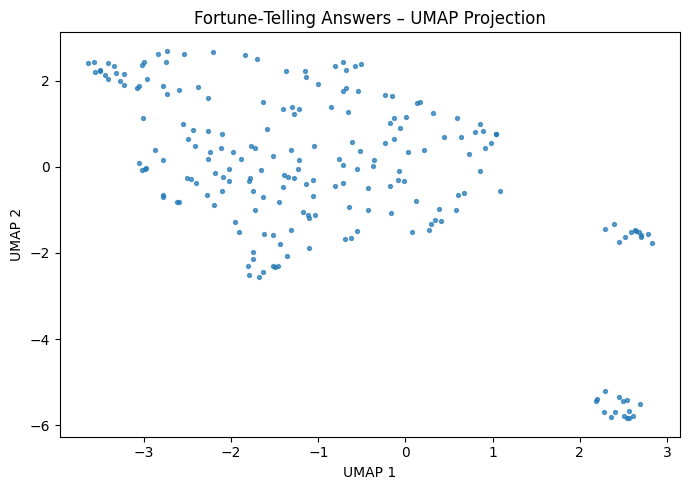

In [12]:
print("Embedding responses with sentence‑transformer… (≈30 s on CPU)")
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
emb = model.encode(df["Response"].tolist(), batch_size=32, show_progress_bar=True)

print("Projecting to 2‑D with UMAP…")
umap_proj = umap.UMAP(random_state=42).fit_transform(emb)

# Display scatter
plt.figure(figsize=(7, 5))
plt.scatter(umap_proj[:, 0], umap_proj[:, 1], s=8, alpha=0.7)
plt.title("Fortune‑Telling Answers – UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()

## What the scatter tells us




| Visual cue                                                        | Interpretation                                                                                                                                           | Why it matters                                                                                                                                                                                                  |
| ----------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Single large “cloud”** stretching from ≈ (-3, 2.5) to (0.5, -2) | Most answers share a common style and vocabulary, so the mini-LM embeddings see them as variations on one theme rather than clearly distinct sub-genres. | Good news: the corpus is internally coherent, so a single LoRA adapter should capture its register.                                                                                                             |
| **Two tight micro-clusters** near *(2.5, -1.5)* and *(2.5, -6)*   | These are likely formulaic templates—e.g. “五星命盘” summaries or stock “爱情运势” advice—whose wording recurs almost verbatim.                                  | They may cause over-fitting. We can (a) de-duplicate them or (b) treat them as a held-out “template subset” to test generalisation.                                                                             |
| **Slight gradient rather than crisp islands**                     | Content probably varies along subtle axes (e.g. pragmatic advice ↔ poetic metaphor, or career vs. love topics) rather than neat topic buckets.           | For *RQ3* we’ll be looking for **tighter structure after fine-tuning**. If the tuned model reduces variance along one axis (e.g., adopts a consistent mystical tone) we’ll see shrunken spread or new clusters. |


In [13]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, metric='euclidean').fit(emb)
labels = clusterer.labels_
df['cluster'] = labels               # keeps original order


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<ipython-input-14-b81d7d16305f>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab10", n_clusters + 1)


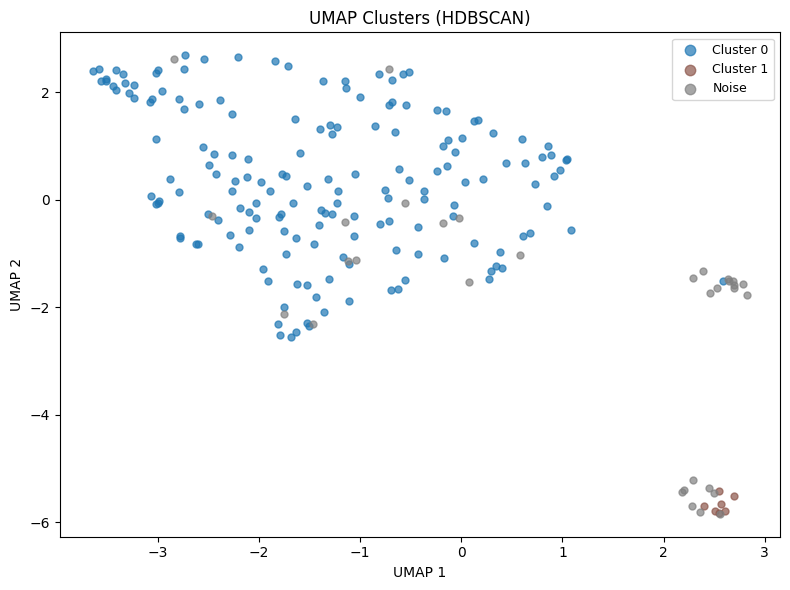

In [14]:
# ─── 2D Cluster Plot by HDBSCAN ──────────────────────────────────────────────

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_umap_clusters(umap_proj, labels, title="UMAP Clusters (HDBSCAN)"):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    colors = cm.get_cmap("tab10", n_clusters + 1)

    plt.figure(figsize=(8, 6))
    for label in set(labels):
        idx = labels == label
        label_name = f"Cluster {label}" if label != -1 else "Noise"
        plt.scatter(
            umap_proj[idx, 0],
            umap_proj[idx, 1],
            s=25,
            alpha=0.7,
            label=label_name,
            c=[colors(label % 10)] if label != -1 else "gray"
        )
    plt.title(title)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(loc="best", fontsize=9, markerscale=1.5)
    plt.tight_layout()
    plt.show()

# Call it:
plot_umap_clusters(umap_proj, labels)
